# Ecuaciones Diferenciales Parciales.

## Diferenciación numérica

Antes de Resolver ecuaciones parciales. Tenemos que hacer el programita de diferenciación numérica.

### Diferencias adelantadas y atrasadas. 

La definición de derivada es:
    $$
    \frac{df}{dx}=\lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}
    $$
En computación, no es posible tomar el límite, por lo que aproximamos a una $h$ muy pequeña
    $$
    \frac{df}{dx}\approx \frac{f(x+h)-f(x)}{h}
    $$
y a está trivial aproximación, la llamamos diferencias adelantadas.


Diferencias atrasadas, será la imagen espejo de la definición anterior.
    $$
    \frac{df}{dx}\approx \frac{f(x)-f(x-h)}{h}
    $$


![title](fig_1.png)

### Diferencias Centrales

Mejorando las aproximaciones de diferencias adelantadas y atrasadas. Una manera fácil es usar diferencias centradas. 
    $$
    \frac{df}{dx}\approx \frac{f(x+\frac{h}{2})-f(x-\frac{h}{2})}{h}
    $$

In [1]:
from math import *

def derivada(f,x, h = 1e-8):
    return (f(x+h/2)-f(x-h/2))/h

print(derivada(cos,0)) # 0.0
print(derivada(cos,pi/2)) # -0.999999993923

0.0
-0.999999993922529


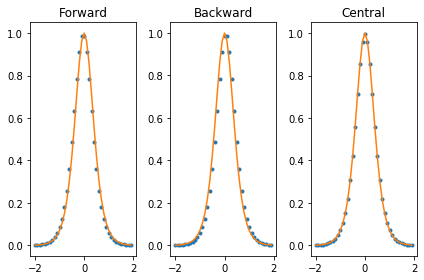

In [2]:
from pylab import *

def forward(f,x, h = 1e-4):
    return (f(x+h)-f(x))/h

def backward(f,x, h = 1e-4):
    return (f(x)-f(x-h))/h

def derivada(f,x, h = 1e-4):
    return (f(x+h/2)-f(x-h/2))/h

f=lambda x:1+0.5*tanh(2*x)
lista_forward=[]
lista_backward=[]
lista_derivada=[]
x=arange(-2,2,0.1)
for i in x:
    lista_forward.append(forward(f,i,1e-1))
    lista_backward.append(backward(f,i,1e-1))
    lista_derivada.append(derivada(f,i,1e-1))
    

subplot(1,3,1)
plot(x,lista_forward,'.')
plot(x,(1-tanh(2*x)**2))
title('Forward')

subplot(1,3,2)
plot(x,lista_backward,'.')
plot(x,(1-tanh(2*x)**2))
title('Backward')


subplot(1,3,3)
plot(x,lista_derivada,'.')
plot(x,(1-tanh(2*x)**2))
title('Central')

tight_layout()
show()

### Segunda derivada

### ejercicio

Deducir la expresion para $\frac{d^2f}{dx^2}$ usando las expresiones usando la derivada para adelante para atras y la del punto medio.



#### Respuesta:
Adelantadas:
\begin{equation*}
\begin{split}
\frac{d^2f}{dx^2} & \approx \frac{f'(x+h)-f'(x)}{h} \approx \frac{f(x+2h)-f(x+h)-f(x+h)+f(x)}{h^2} \\
& = \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}
\end{split}
\end{equation*}

Atrasadas:
\begin{equation*}
\begin{split}
\frac{d^2f}{dx^2} & \approx \frac{f'(x)-f'(x-h)}{h} \approx \frac{f(x)-f(x-h)-f(x-h)+f(x-2h)}{h^2} \\
& = \frac{f(x)-2f(x-h)+f(x-2h)}{h^2}
\end{split}
\end{equation*}

Punto medio:
\begin{equation*}
\begin{split}
\frac{d^2f}{dx^2} & \approx \frac{f'(x+h/2)-f'(x-h/2)}{h} \approx \frac{f(x+h)-f(x)-f(x)+f(x-h)}{h^2} \\
& = \frac{f(x+h)-2f(x)+f(x-h)}{h^2}
\end{split}
\end{equation*}

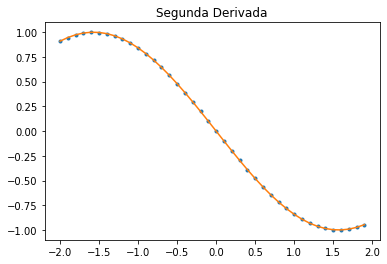

In [3]:
from pylab import *

def derivada_2(f,x, h = 1e-4):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

f=lambda x:sin(x)

lista_derivada_2=[]
x=arange(-2,2,0.1)
for i in x:
    lista_derivada_2.append(derivada_2(f,i,1e-1))

plot(x,lista_derivada_2,'.')
plot(x,(-sin(x)))
title('Segunda Derivada')

show()

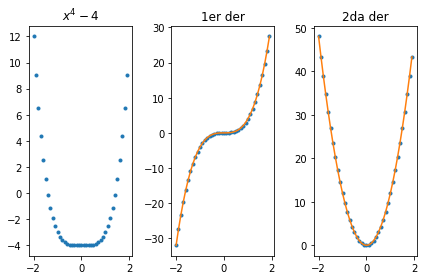

In [7]:
from pylab import *

def derivada(f,x, h = 1e-4):
    return (f(x+h/2)-f(x-h/2))/h

def derivada_2(f,x, h = 1e-4):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

f=lambda x:(x)**4-4
df= lambda x: 4*x**3
ddf=lambda x: 12*x**2


lista=[]
lista_derivada=[]
lista_derivada_2=[]
x=arange(-2,2,0.1)
for i in x:
    lista.append(f(i))
    lista_derivada.append(derivada(f,i))
    lista_derivada_2.append(derivada_2(f,i))

subplot(1,3,1)
plot(x,lista,'.')
title('$x^4-4$')
    
subplot(1,3,2)
plot(x,lista_derivada,'.')
plot(x,df(x))
title('1er der')

subplot(1,3,3)
plot(x,lista_derivada_2,'.')
plot(x,ddf(x))
title('2da der')

tight_layout()
show()

# Ecuaciones diferenciales Parciales

## Ecuación de Laplace

Potencial electrostático $\phi$ en ausencia de carga eléctrica está descrito por:

$$
\nabla^2 \phi =0
$$
que es la ecuación de Laplace. El operador $\nabla^2$ en cartesianas es: 
$$
\frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}+\frac{\partial^2 \phi}{\partial z^2}
$$

Para resolver esta ecuación hay muchos métodos. El más sencillo es el método de relajación

### Método de relajación 

Sea una placa bidimensional como se muestra en la figura:
![title](fig_2.png)

Para hacer este desarrollo, usamos el método de diferencias finitas o el método de elemento finito, que es utilizar la fórmula de segunda derivada en cada dimensión.

$$
\frac{\partial^2\phi(x,y)}{\partial x^2} = \frac{\phi(x+a,y)-2\phi(x,y)+\phi(x-a,y)}{a^2}
$$

y

$$
\frac{\partial^2\phi(x,y)}{\partial y^2} = \frac{\phi(x,y+a)-2\phi(x,y)+\phi(x,y-a)}{a^2}
$$

Uniendo las dos parciales en la ecuación de Laplace, tenemos:

$$
\nabla^2 \phi= \frac{\partial^2\phi(x,y)}{\partial y^2} +\frac{\partial^2\phi(x,y)}{\partial y^2} = \frac{\phi(x+a,y)-2\phi(x,y)+\phi(x-a,y)}{a^2} + \frac{\phi(x,y+a)-2\phi(x,y)+\phi(x,y-a)}{a^2}=0
$$

Manipulando la expresión:

$$
\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)-4\phi(x,y)=0
$$

Tenemos un mallado de cuadritos de tamaño $a$ y para cada cuadro hay que resolver está ecuación. Así que tenemos un sistema de N ecuaciones. Este sistema de ecuaciones se resuelven simultaneamente y lo haremos con el método de relajación.

$$
\phi(x,y) =\frac{1}{4}\left[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a) \right]
$$

El problema que resolveremos es:
De la figura anterior, pensamos que la caja tiene 1m de lado y la parte de arriba está a V=1 volt, lo demás está aterrizado. Hacemos el espaciado del mallado (grid) de a=1 cm y N=100 puntos.

Nota: Tenemos que resolver un sistema de 100 ecuaciones lineales. 

### Ejercicio

Como seria el metodo para $\phi(x,y,z)$?

#### Respuesta:

En tres dimensiones:
$$
\frac{\partial^2\phi(x,y,z)}{\partial x^2} = \frac{\phi(x+a,y,z)-2\phi(x,y,z)+\phi(x-a,y,z)}{a^2}
$$
$$
\frac{\partial^2\phi(x,y,z)}{\partial y^2} = \frac{\phi(x,y+a,z)-2\phi(x,y,z)+\phi(x,y-a,z)}{a^2}
$$
$$
\frac{\partial^2\phi(x,y,z)}{\partial z^2} = \frac{\phi(x,y,z+a)-2\phi(x,y,z)+\phi(x,y,z-a)}{a^2}
$$

Entonces la ecuación de Laplace:
\begin{equation*}
\begin{split}
\nabla^2 \phi &= \frac{\partial^2\phi(x,y,z)}{\partial y^2} +\frac{\partial^2\phi(x,y,z)}{\partial y^2} \frac{\partial^2\phi(x,y,z)}{\partial z^2} \\ 
& = \frac{\phi(x+a,y,z)-2\phi(x,y,z)+\phi(x-a,y,z)}{a^2} + \frac{\phi(x,y+a,z)-2\phi(x,y,z)+\phi(x,y-a,z)}{a^2} +\frac{\phi(x,y,z+a)-2\phi(x,y,z)+\phi(x,y,z-a)}{a^2} \\
& = 0
\end{split}
\end{equation*}

Haciendo el mismo despeje, la ecuación a resolver en el mallado (tridimensional) es
$$
\phi(x+a,y,z)+\phi(x-a,y,z)+\phi(x,y+a,z)+\phi(x,y-a,z)+\phi(x,y,z+a)+\phi(x,y,z-a)-6\phi(x,y,z)=0
$$
que por el método de relajación se resuelve con
$$
\phi(x,y) =\frac{1}{6}\left[\phi(x+a,y,z)+\phi(x-a,y,z)+\phi(x,y+a,z)+\phi(x,y-a,z)+\phi(x,y,z+a)+\phi(x,y,z-a) \right]
$$

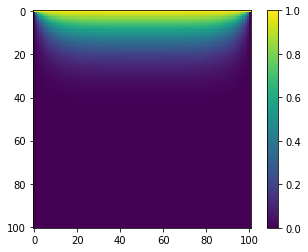

In [5]:
from pylab import *
M,V=100,1.0
# Ponemos el numero maximo de iteraciones
maxIter = 500
phi=zeros([M+1,M+1],float)
phi[0,:]=V
phi_1=zeros([M+1,M+1],float)
delta=1.0
for iteracion in range(0, maxIter):
    for i in range(M):
        for j in range(M):
            if i==0 or i==M or j==0 or j==M:
                phi_1[i,j]=phi[i,j] #frontera
            else:
                phi_1[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4

    phi,phi_1=phi_1,phi #actualizo los valores
    
imshow(phi)
#gray()
colorbar()
show()

#### Ejercicio

Modificar el codigo anterior para que tambien el lado derecho de la caja este a un potencial 1.

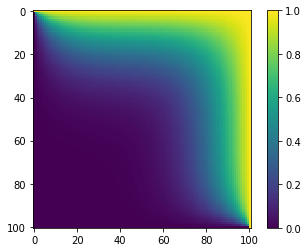

In [63]:
from pylab import *
M,V=100,1.0
# Ponemos el numero maximo de iteraciones
maxIter = 500
phi=zeros([M+1,M+1],float)
phi[0,:]=V #Superior
phi[:,M]=V #Derecha
#phi[:,0]=V #Inferior
#phi[M,:]=V #Izquierda
#phi_1=zeros([M+1,M+1],float)
phi_1 = phi[:] #El de arriba daba problemas en la frontera derecha e inferior
delta=1.0
for iteracion in range(0, maxIter):
    for i in range(M):
        for j in range(M):
            if i==0 or i==M or j==0 or j==M:
                phi_1[i,j]=phi[i,j] #frontera
            else:
                phi_1[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4

    phi = phi_1[:] #actualizo los valores
    
imshow(phi)
#gray()
colorbar()
show()

# Ecuación de Poisson

Resolvamos la ecuación de Poisson:
    
$$
\nabla ^2 \phi = -\frac{\rho}{\epsilon_0}
$$

![title](fig_3.png)

Con cargas metálicas con densidades de carga de 1 $Cm^{-2}$ y -1 $Cm^{-2}$

Podemos expresarla usando el metodo de relajacion:

$$
\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)-4\phi(x,y)=-\frac{\rho(x,y)}{\epsilon_0}
$$

Re agrupando terminos podemos obtener una expresion para $\phi(x,y)$

$$
\phi(x,y) =\frac{1}{4}\left[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a) \right] + \frac{a^2}{4\epsilon_0}\rho(x,y)
$$

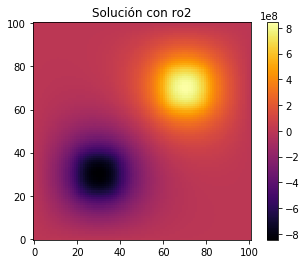

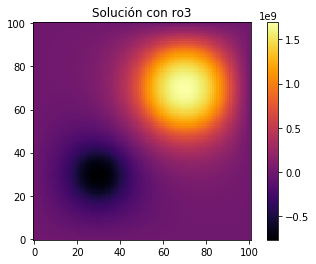

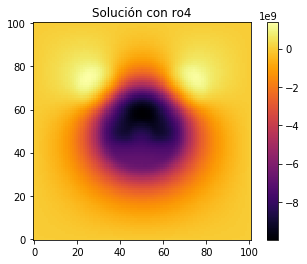

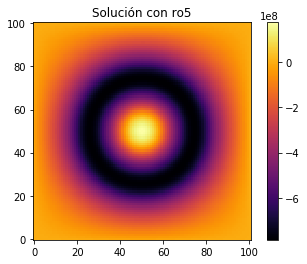

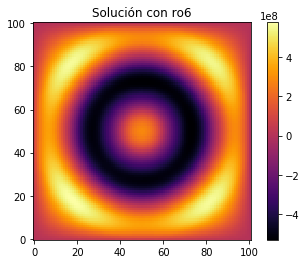

--- 1186.8402416706085 segundos ---


In [86]:
from pylab import *
import time

t0 = time.time()

M,V=100,1.0

def ro2(x,y):
    if x>0.6 and x<0.8 and y>0.6 and y<0.8:
        return 1
    elif x>0.2 and x<0.4 and y>0.2 and y<0.4:
        return -1
    else:
        return 0
    
def ro3(x,y):
    c1=np.array([0.7,0.7])
    c2=np.array([0.3,0.3])
    myP=np.array([x,y])
    r=0.2
    if np.linalg.norm(c1-myP) <= r:
        return 1
    elif np.linalg.norm(c2-myP) <= r/2:
        return -1
    else:
        return 0

def ro4(x,y):
    c1=np.array([0.7,0.7]) #Oreja
    c2=np.array([0.7,0.3]) #Oreja
    c3=np.array([0.5,0.5]) #Cara
    c4=np.array([0.55,0.6]) #Ojos
    c5=np.array([0.55,0.4]) #Ojos
    r=np.array([x,y])
    if np.linalg.norm(r-c4) <= 0.05 or np.linalg.norm(r-c5) <= 0.05:
        return -5
    if np.linalg.norm(r-c3) <= 0.05:
        return 2
    if np.linalg.norm(r-c3) <= 0.15 and x<=0.45:
        return 0
    if np.linalg.norm(r-c3) <= 0.2:
        return -10
    if np.linalg.norm(r-c1) <= 0.1 or np.linalg.norm(r-c2) <= 0.1:
        return 5
    return 0

def ro5(x,y):
    c1=np.array([0.5,0.5])
    myP=np.array([x,y])
    r1=0.1
    r2=0.2
    r3=0.3
    r4=0.4
    if np.linalg.norm(c1-myP) <= r1:
        return 1
    elif np.linalg.norm(c1-myP) <= r2:
        return 0
    if np.linalg.norm(c1-myP) <= r3:
        return -1
    if np.linalg.norm(c1-myP) <= r4:
        return 0
    else:
        return 0

def ro6(x,y):
    c1=np.array([0.5,0.5])
    myP=np.array([x,y])
    r1=0.1
    r2=0.2
    r3=0.3
    r4=0.4
    r5=0.5
    myNorm=np.linalg.norm(c1-myP)
    if myNorm <= r1:
        return 1
    elif myNorm <= r2:
        return 0
    if myNorm <= r3:
        return -1
    if myNorm <= r4:
        return 0
    if myNorm <= r5:
        return 1
    else:
        return 0

# Ponemos el numero maximo de iteraciones
maxIter = 500
n=1
for ro in [ro2,ro3,ro4,ro5,ro6]:
    n+=1
    phi=zeros([M+1,M+1],float)
    phi[0,:]=V
    phi_1=phi[:]
    a=0.01
    epsilon=8.85e-12
    for iteracion in range(0, maxIter):
        for i in range(M):
            for j in range(M):
                phi_1[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+\
                            phi[i,j-1])/4+(a**2)/(4*epsilon)*ro(i*a,j*a)
    
        phi,phi_1=phi_1,phi #actualizo los valores
        
    
    imshow(phi,origin='lower')
    #set_cmap("Blues_r")
    set_cmap("inferno")
    colorbar()
    title('Solución con ro'+str(n))
    show()
print("--- %s segundos ---" % (time.time()  -  t0))

### Ejercicio

Usando como base el ejemplo anterios hacer un Mickey Mouse.

# Método de Sobrerelajación con Gauss-Seidel

Para hacer el código más rápido, tenemos que hacer una modificación. En el código anterior, hacemos una copia de la matriz que guarda el sistema de ecuaciónes lineales a resolver. Ahora, le aplicaremos un término con un parámetro de peso:

Matriz anterior:
$$
\phi_1(x,y)=\phi(x,y)+\Delta \phi(x,y),
$$

Nueva matriz
$$
\phi_1(x,y)=\phi(x,y)+(1+\omega) \Delta \phi(x,y),
$$
con $\omega>0$.

Y para seguir mejorando el programa, el valor de peso será introducido a la matriz original y nos ahorraremos la copia:

$$
\phi(x,y) \leftarrow \frac{1+\omega}{4} \left[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a) \right] -\omega \phi(x,y)
$$

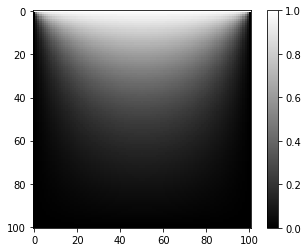

In [10]:
from pylab import *
M,V=100,1.0
# Ponemos el numero maximo de iteraciones
maxIter = 500
phi=zeros([M+1,M+1],float)
phi[0,:]=V
delta=1.0
omega=0.9
for iteracion in range(0, maxIter):
    for i in range(M):
        for j in range(M):
            if i==0 or i==M or j==0 or j==M:
                phi[i,j]=phi[i,j] #frontera
            else:
                phi[i,j] = (1+omega)*(phi[i+1,j] \
                                      + phi[i-1,j] + phi[i,j+1] \
                                      + phi[i,j-1])/4 - omega*phi[i,j]
    
imshow(phi)
gray()
colorbar()
show()